In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def read_points(filename):
    points = []
    with open(filename, encoding='utf-8') as f:
        next(f)
        for line in f:
            points.append([float(c) for c in line.split()] + [1.])
    return np.array(points)

In [3]:
pt1 = read_points('pt_2D_1.txt')
pt2 = read_points('pt_2D_2.txt')

In [4]:
pt1

array([[278.      ,  38.      ,   1.      ],
       [129.      ,  24.      ,   1.      ],
       [179.64299 ,  76.285942,   1.      ],
       [227.      , 265.      ,   1.      ],
       [345.      , 274.      ,   1.      ],
       [342.      , 326.      ,   1.      ],
       [236.597595, 202.195297,   1.      ],
       [150.77916 , 217.13739 ,   1.      ],
       [109.      , 206.      ,   1.      ],
       [152.      , 214.      ,   1.      ],
       [175.174774, 253.780334,   1.      ],
       [227.      , 232.      ,   1.      ],
       [176.      , 221.      ,   1.      ],
       [224.      , 235.      ,   1.      ],
       [223.      , 260.      ,   1.      ],
       [179.      , 250.      ,   1.      ],
       [179.      , 225.      ,   1.      ],
       [154.      , 249.      ,   1.      ],
       [156.      , 253.      ,   1.      ],
       [195.      , 276.      ,   1.      ],
       [168.892395, 276.063934,   1.      ],
       [151.71759 , 276.454132,   1.      ],
       [17

In [5]:
uv_matrices = pt1[:, :, np.newaxis] @ pt2[:, np.newaxis]
uv_matrices

array([[[7.22800000e+04, 9.73000000e+03, 2.78000000e+02],
        [9.88000000e+03, 1.33000000e+03, 3.80000000e+01],
        [2.60000000e+02, 3.50000000e+01, 1.00000000e+00]],

       [[1.04490000e+04, 3.35400000e+03, 1.29000000e+02],
        [1.94400000e+03, 6.24000000e+02, 2.40000000e+01],
        [8.10000000e+01, 2.60000000e+01, 1.00000000e+00]],

       [[2.96410933e+04, 1.43714392e+04, 1.79642990e+02],
        [1.25871804e+04, 6.10287536e+03, 7.62859420e+01],
        [1.65000000e+02, 8.00000000e+01, 1.00000000e+00]],

       [[5.60690000e+04, 6.01550000e+04, 2.27000000e+02],
        [6.54550000e+04, 7.02250000e+04, 2.65000000e+02],
        [2.47000000e+02, 2.65000000e+02, 1.00000000e+00]],

       [[9.24600000e+04, 8.79750000e+04, 3.45000000e+02],
        [7.34320000e+04, 6.98700000e+04, 2.74000000e+02],
        [2.68000000e+02, 2.55000000e+02, 1.00000000e+00]],

       [[9.16560000e+04, 1.03284000e+05, 3.42000000e+02],
        [8.73680000e+04, 9.84520000e+04, 3.26000000e+02],
    

In [6]:
uv_matrices = uv_matrices.reshape((-1, 9))
uv_matrices

array([[7.22800000e+04, 9.73000000e+03, 2.78000000e+02, 9.88000000e+03,
        1.33000000e+03, 3.80000000e+01, 2.60000000e+02, 3.50000000e+01,
        1.00000000e+00],
       [1.04490000e+04, 3.35400000e+03, 1.29000000e+02, 1.94400000e+03,
        6.24000000e+02, 2.40000000e+01, 8.10000000e+01, 2.60000000e+01,
        1.00000000e+00],
       [2.96410933e+04, 1.43714392e+04, 1.79642990e+02, 1.25871804e+04,
        6.10287536e+03, 7.62859420e+01, 1.65000000e+02, 8.00000000e+01,
        1.00000000e+00],
       [5.60690000e+04, 6.01550000e+04, 2.27000000e+02, 6.54550000e+04,
        7.02250000e+04, 2.65000000e+02, 2.47000000e+02, 2.65000000e+02,
        1.00000000e+00],
       [9.24600000e+04, 8.79750000e+04, 3.45000000e+02, 7.34320000e+04,
        6.98700000e+04, 2.74000000e+02, 2.68000000e+02, 2.55000000e+02,
        1.00000000e+00],
       [9.16560000e+04, 1.03284000e+05, 3.42000000e+02, 8.73680000e+04,
        9.84520000e+04, 3.26000000e+02, 2.68000000e+02, 3.02000000e+02,
        1.0

In [7]:
_, _, VT = np.linalg.svd(uv_matrices)

In [8]:
VT

array([[-4.37430093e-01, -4.70275641e-01, -1.51528269e-03,
        -4.98552106e-01, -5.82177488e-01, -1.81629318e-03,
        -1.49608684e-03, -1.75277874e-03, -5.73533823e-06],
       [ 6.55401540e-01,  1.99727900e-01,  1.30769744e-03,
         8.17486154e-02, -7.23785126e-01, -1.71302144e-03,
         6.13567307e-04, -2.19582418e-03, -4.25030109e-06],
       [ 3.18341420e-01,  2.85120905e-01,  4.10458470e-03,
        -8.62965760e-01,  2.69462960e-01,  3.26675817e-03,
         9.18587773e-04,  4.03186378e-03,  2.43481240e-05],
       [ 5.27017154e-01, -8.10948892e-01,  3.15058366e-04,
         5.81685380e-03,  2.54110397e-01, -1.43786435e-03,
         2.25280448e-03, -1.28148323e-03,  5.07237976e-06],
       [-2.68965384e-03, -3.01029024e-03,  4.51452880e-01,
         3.63642228e-03, -4.27741982e-03,  4.48185959e-01,
         5.49603391e-01,  5.41471438e-01,  4.07707801e-03],
       [-2.84440873e-03,  1.82128398e-03,  5.61027135e-01,
        -9.42242119e-04,  1.90858734e-03, -4.379490

In [9]:
F_hat = VT[-1].reshape((3, 3))
F_hat

array([[-5.34984645e-06, -2.76077646e-05,  1.07623601e-02],
       [ 2.76955259e-05, -6.63869037e-06, -1.22519236e-02],
       [-6.42650351e-03,  1.52182037e-02, -9.99730547e-01]])

In [10]:
U, D, VT = np.linalg.svd(F_hat)
D[-1] = 0
F = U @ np.diag(D) @ VT
F

array([[-5.63087200e-06, -2.77622828e-05,  1.07623595e-02],
       [ 2.74976583e-05, -6.74748522e-06, -1.22519240e-02],
       [-6.42650411e-03,  1.52182033e-02, -9.99730547e-01]])

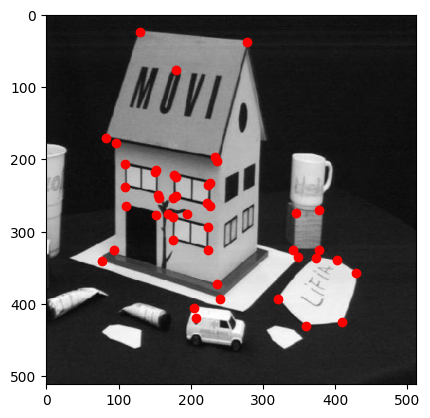

In [11]:
image = cv2.imread('image1.jpg')
plt.imshow(image, cmap='gray')
plt.scatter(pt1[..., 0], pt1[..., 1], c='r')

In [90]:
F.shape, pt2.shape

((3, 3), (46, 3))

In [91]:
pt1.shape

(46, 3)

In [87]:
lines1 = F @ pt2[..., np.newaxis]
lines1

array([[[ 8.32665292e-03],
        [-5.33869479e-03],
        [-2.13798450e+00]],

       [[ 9.58443955e-03],
        [-1.02000483e-02],
        [-1.12460409e+00]],

       [[ 7.61228303e-03],
        [-8.25460917e-03],
        [-8.42647459e-01]],

       [[ 2.01452922e-03],
        [-7.24808595e-03],
        [ 1.44574682e+00]],

       [[ 2.17390373e-03],
        [-6.60316028e-03],
        [ 1.15860820e+00]],

       [[ 8.69076441e-04],
        [-6.92029208e-03],
        [ 1.87386376e+00]],

       [[ 3.73985331e-03],
        [-6.28029642e-03],
        [ 3.19241822e-01]],

       [[ 3.44309390e-03],
        [-9.52770584e-03],
        [ 1.52835798e+00]],

       [[ 3.89160327e-03],
        [-1.10063396e-02],
        [ 1.80572469e+00]],

       [[ 3.56501270e-03],
        [-9.41147544e-03],
        [ 1.43298746e+00]],

       [[ 2.37451295e-03],
        [-8.86370031e-03],
        [ 1.80969236e+00]],

       [[ 2.98620911e-03],
        [-7.01192397e-03],
        [ 9.13109704e-01]],

    

In [92]:
lines1.shape

(46, 3, 1)

In [94]:
a, b, c = np.split(lines1, 3, axis=1)
a.flatten()

array([ 8.32665292e-03,  9.58443955e-03,  7.61228303e-03,  2.01452922e-03,
        2.17390373e-03,  8.69076441e-04,  3.73985331e-03,  3.44309390e-03,
        3.89160327e-03,  3.56501270e-03,  2.37451295e-03,  2.98620911e-03,
        3.31843056e-03,  2.89768347e-03,  2.14810183e-03,  2.46866946e-03,
        3.21825110e-03,  2.53780823e-03,  2.43199790e-03,  1.74528180e-03,
        1.80878970e-03,  1.79948834e-03,  1.63619306e-03,  1.28184020e-03,
        2.31114684e-03, -2.03181517e-03, -2.47194914e-03,  3.84527157e-03,
        5.62013712e-04,  9.28271492e-04,  2.17034174e-03, -2.47863191e-04,
        1.11870253e-04, -9.01294630e-04, -1.45771652e-03,  5.01531671e-03,
        4.83145832e-03, -2.10565887e-03, -1.10627399e-03, -1.85775872e-03,
        5.66577662e-04,  4.70068683e-04,  8.99139278e-05,  7.47800007e-04,
        4.04708892e-04,  2.89216109e-03])

In [51]:

start_pts = np.hstack((np.zeros_like(lines1[:, 0]),
                       -lines1[:, 2] / lines1[:, 1]))
end_pts = np.hstack((np.ones_like(lines1[:, 0]) * 512,
                     -(lines1[:, 2] + lines1[:, 0] * 512) / lines1[:, 1]))
epi_lines1 = np.stack((start_pts, end_pts), axis=1).astype(int)
epi_lines1

array([[[   0, -400],
        [ 512,  398]],

       [[   0, -110],
        [ 512,  370]],

       [[   0, -102],
        [ 512,  370]],

       [[   0,  199],
        [ 512,  341]],

       [[   0,  175],
        [ 512,  344]],

       [[   0,  270],
        [ 512,  335]],

       [[   0,   50],
        [ 512,  355]],

       [[   0,  160],
        [ 512,  345]],

       [[   0,  164],
        [ 512,  345]],

       [[   0,  152],
        [ 512,  346]],

       [[   0,  204],
        [ 512,  341]],

       [[   0,  130],
        [ 512,  348]],

       [[   0,  149],
        [ 512,  346]],

       [[   0,  139],
        [ 512,  347]],

       [[   0,  192],
        [ 512,  342]],

       [[   0,  197],
        [ 512,  341]],

       [[   0,  153],
        [ 512,  346]],

       [[   0,  206],
        [ 512,  341]],

       [[   0,  210],
        [ 512,  340]],

       [[   0,  231],
        [ 512,  338]],

       [[   0,  237],
        [ 512,  338]],

       [[   0,  244],
        [ 51

In [52]:
image = cv2.imread('image1.jpg')
cv2.polylines(image, epi_lines1, False, (255, 0, 0))

array([[[21, 21, 21],
        [21, 21, 21],
        [22, 22, 22],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[23, 23, 23],
        [23, 23, 23],
        [24, 24, 24],
        ...,
        [24, 24, 24],
        [24, 24, 24],
        [24, 24, 24]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [23, 23, 23]],

       ...,

       [[33, 33, 33],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [20, 20, 20],
        [21, 21, 21],
        [21, 21, 21]],

       [[31, 31, 31],
        [32, 32, 32],
        [33, 33, 33],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [22, 22, 22]],

       [[30, 30, 30],
        [31, 31, 31],
        [31, 31, 31],
        ...,
        [19, 19, 19],
        [20, 20, 20],
        [20, 20, 20]]], dtype=uint8)

In [56]:
lines2 = F.T[np.newaxis] @ pt1[..., np.newaxis]
start_pts = np.hstack((np.zeros_like(lines2[:, 0]),
                       -lines2[:, 2] / lines2[:, 1]))
end_pts = np.hstack((np.ones_like(lines2[:, 0]) * 512,
                     -(lines2[:, 2] + lines2[:, 0] * 512) / lines2[:, 1]))
epi_lines2 = np.stack((start_pts, end_pts), axis=1).astype(int)

image2 = cv2.imread('image2.jpg')
cv2.polylines(image2, epi_lines2, False, (255, 0, 0))

array([[[255,   0,   0],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 25,  25,  25],
        [ 26,  26,  26],
        [ 26,  26,  26]],

       [[ 22,  22,  22],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 22,  22,  22],
        [ 22,  22,  22],
        [ 23,  23,  23]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 19,  19,  19]],

       ...,

       [[ 34,  34,  34],
        [ 36,  36,  36],
        [ 37,  37,  37],
        ...,
        [ 24,  24,  24],
        [ 25,  25,  25],
        [ 25,  25,  25]],

       [[ 32,  32,  32],
        [ 34,  34,  34],
        [ 36,  36,  36],
        ...,
        [ 24,  24,  24],
        [ 23,  23,  23],
        [ 23,  23,  23]],

       [[ 30,  30,  30],
        [ 32,  32,  32],
        [ 34,  34,  34],
        ...,
        [ 23,  23,  23],
        [ 23,  23,  23],
        [ 22,  22,  22]]

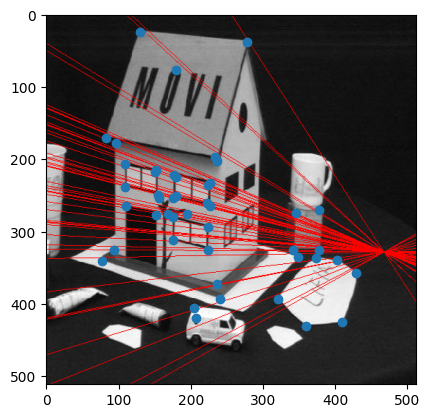

In [57]:
plt.imshow(image)
plt.scatter(pt1[..., 0], pt1[..., 1])

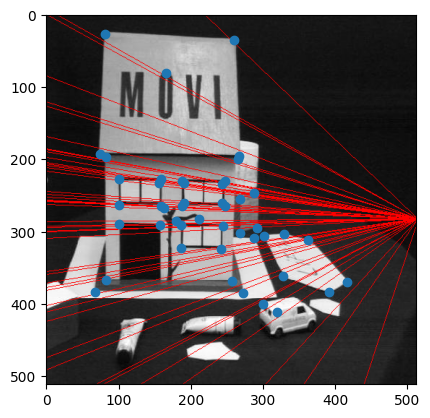

In [58]:
plt.imshow(image2)
plt.scatter(pt2[..., 0], pt2[..., 1])

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

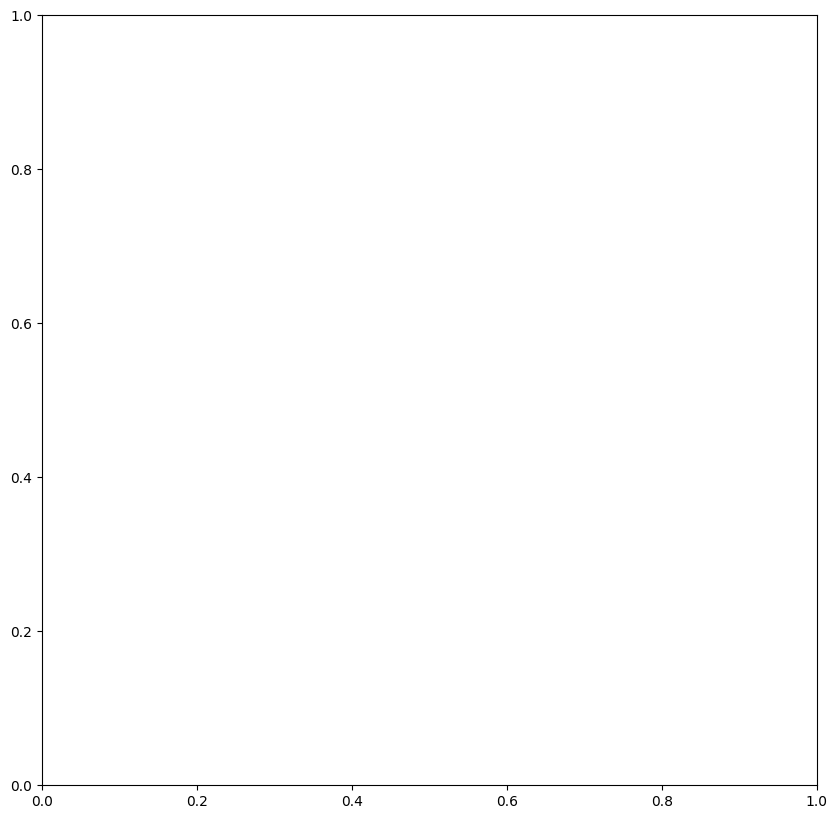

In [60]:
plt.subplots(1, 1, figsize=(10, 10))

In [61]:
plt.required_interactive_framework

AttributeError: module 'matplotlib.pyplot' has no attribute 'required_interactive_framework'

In [68]:
pt1[..., :2] - pt1[..., :2].mean(axis=0)

array([[  55.3241627 , -235.40953543],
       [ -93.6758373 , -249.40953543],
       [ -43.0328473 , -197.12359343],
       [   4.3241627 ,   -8.40953543],
       [ 122.3241627 ,    0.59046457],
       [ 119.3241627 ,   52.59046457],
       [  13.9217577 ,  -71.21423843],
       [ -71.8966773 ,  -56.27214543],
       [-113.6758373 ,  -67.40953543],
       [ -70.6758373 ,  -59.40953543],
       [ -47.5010633 ,  -19.62920143],
       [   4.3241627 ,  -41.40953543],
       [ -46.6758373 ,  -52.40953543],
       [   1.3241627 ,  -38.40953543],
       [   0.3241627 ,  -13.40953543],
       [ -43.6758373 ,  -23.40953543],
       [ -43.6758373 ,  -48.40953543],
       [ -68.6758373 ,  -24.40953543],
       [ -66.6758373 ,  -20.40953543],
       [ -27.6758373 ,    2.59046457],
       [ -53.7834423 ,    2.65439857],
       [ -70.9582473 ,    3.04459657],
       [ -47.6758373 ,    6.59046457],
       [   1.3241627 ,   19.59046457],
       [ 154.3241627 ,   -3.40953543],
       [ -18.6758373 ,  1

In [75]:
pt1[0]

array([278.,  38.,   1.])

In [77]:
(278**2 + 38**2) ** 0.5

280.58510295452254

In [82]:
def normalization_matrix(pts):
    center = pts[..., :2].mean(axis=0)
    diff = (pts[..., :2] - center).T
    mean_dis = (diff[0] ** 2 + diff[1] ** 2).mean() / 2
    s = 1 / np.sqrt(mean_dis)
    return center, s

In [83]:
normalization_matrix(pt1)

(46,)


(array([222.6758373 , 273.40953543]), 0.010761711553431445)